<h1><center>Multi-layer Perceptron</center></h1>

In this mini-project, we will implement a simple one hidden layer neural network from scratch.
Even if you will use deep learning libraries like Pytorch or Tensorflow later, implementing a network from scratch at least once is an extremely useful exercise, essential for designing and optimizing your own models effectively.


In [1]:
#!pip install numpy
#!pip install sklearn

# Imports of useful packages
import matplotlib # For the plots
import matplotlib.pyplot as plt 
import numpy as np # To perform operations on matrices efficiently


# We will use the sklearn library to compare our neural network to that 
# of a simpler approach like logistic regression

import sklearn 
import sklearn.datasets
import sklearn.linear_model

from math import exp,log

# To display plots inline and adjust the display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generating a dataset

Let's start by generating a dataset that we can play with. The scikit-learn machine learning library has a few useful data generators, saving us the trouble of writing the code ourselves. We will use the make_moons function, which creates a two-class dataset of two-dimensional examples in the shape of two half-moons: each of the half-moons corresponds to a class.

In [2]:
np.random.seed(1)
X, y = sklearn.datasets.make_moons(n_samples=300, noise=0.20)  # We create a dataset with 300 elements

 <font color='red'><b>Question 1.</b></font> Show the coordinates and labels of the first two elements of the dataset.



In [3]:
# You can use f-string as proposed below (https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)
print(f"The first coordinate point {X[0]} has a label {y[0]}")
print(f"The second coordinate point {X[1]} has a label {y[1]}")

The first coordinate point [ 0.21073485 -0.0159868 ] has a label 1
The second coordinate point [-0.82910413  0.65187765] has a label 0


We can display this dataset easily using Matplotlib using colors to make the labels appear $y$ : 

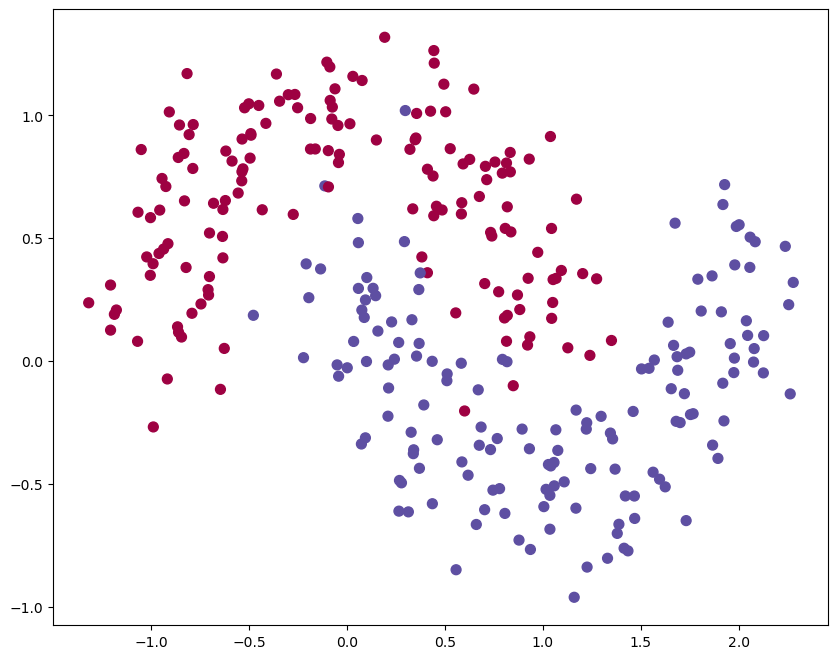

In [4]:
plt.scatter(X[:,0], X[:,1], s=50, c=y+1, cmap=plt.cm.Spectral)
plt.show()

The dataset we generated has two classes, represented by red and blue dots.

Our goal is to train a classifier that predicts the correct class from point coordinates $x_1$ et $x_2$. 

# Find the best line manually

In this part we will try to find the best line that separates our cloud of points manually.

<font color='red'><b>Question 2</b></font>  Creates a function that returns 1 if a coordinate point $(x_1,x_2$) is below the line with slope $a$ and the bias $b$.

In [5]:
def pred_linear(a: float, b: float, x1: float, x2: float):
    return 1 if x2 < a*x1+b else 0

It is important to be able to evaluate the performance of our approaches using metrics. Here, we will choose the accuracy which is simply the number of well-classified elements divided by the total number of elements. To learn more about classification metrics like precision, recall and their link with accuracy, you can consult the following excellent Wikipedia (if you plan to do Machine Learning later, the notion of precision/recall is a classic) https://en.wikipedia.org/wiki/Precision_and_recall

<font color='red'><b>Question 3.</b></font> Complete the following accuracy function. (1 Python line with the comprehension of a list)

In [6]:
def accuracy(y_true, y_pred):
    """
    Args:
        y_true (list[int]): A list of integers having values in {0,1} that contain the class labels
        y_pred (list[int]): A list of integers having values in {0,1} that contain the predictions of the model

    Returns:
        float: The Accuracy of the model
    
    Example:
    >>> accuracy([0,0,1], [0,1,1])
    0.666...
    """
    assert(len(y_true)==len(y_pred))
    return sum(y_true == y_pred)/len(y_true)

In [7]:
#### display function
def plot_decision_boundary(pred_func):
    """
    Shows the decision boundaries of a binary prediction function.
    """
    # Set grid dimensions and give some margin for display
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    # Generate the grid of points with a distance of h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Drawing the decision boundary
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Show contour and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

<font color='red'><b>Question 4.</b></font>  Play by hand with parameters $a$ and $b$ to obtain several linear decision boundaries and try to obtain at least 80% accuracy.



le score obtenu est de:  0.8633333333333333


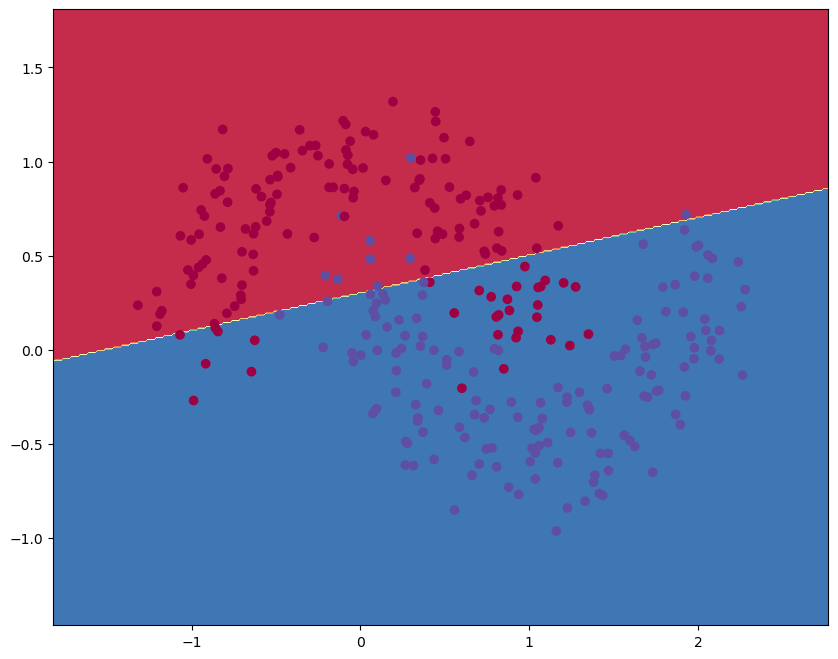

In [8]:
a = 0.2 
b = 0.3 
def prediction(A, a, b, func):
    return np.array([func(a=a, b=b, x1=x[0], x2=x[1]) for x in A])
plot_decision_boundary(lambda x: prediction(x, a, b, pred_linear))
print('le score obtenu est de: ', accuracy(y, prediction(X, a, b, pred_linear)))

# Logistic Regression

Scikit-learn has models such as logistic regression which can find the optimal parameters a and b:

In [9]:
classifier = sklearn.linear_model.LogisticRegressionCV()

 <font color='red'><b>Question 5.</b></font> Train this logistic regression model on the dataset (X,y). You can use the Scikit-learn documentation to see how to train a model on data: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
classifier.fit(X,y)

LogisticRegressionCV()

Once the model is trained, it can be used to predict and draw the decision boundary:

le score obtenu est de:  0.8566666666666667


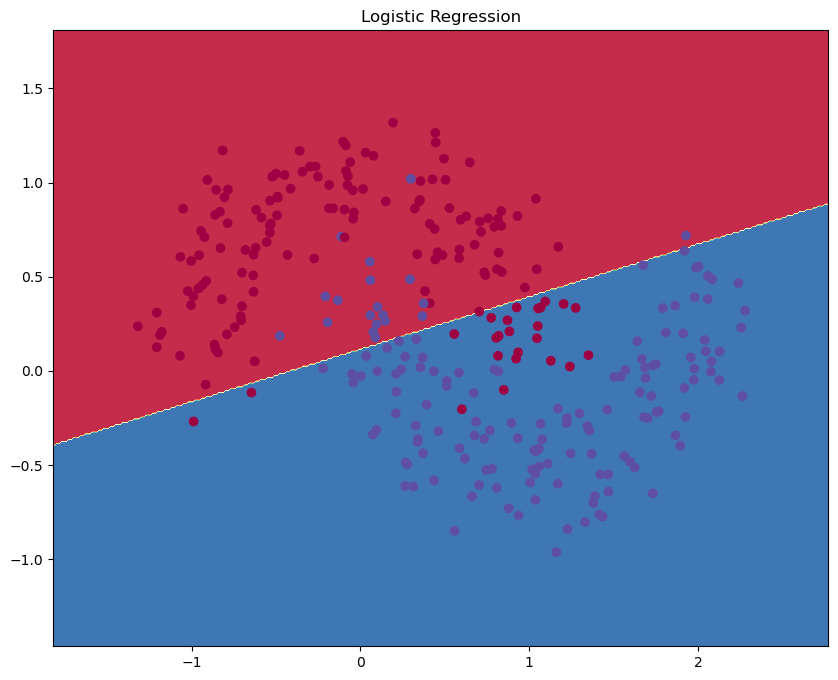

In [11]:
plot_decision_boundary(lambda x: classifier.predict(x))
plt.title("Logistic Regression")
print('le score obtenu est de: ', accuracy(y, classifier.predict(X)))

 <font color='red'><b>Question 6.</b></font> What do you observe? Was such a result predictable? What can we do to improve our predictions?

 <font color='blue'><b>Answer</b></font>  
I observe that the result is good, 85.67% accuracy.

Which also means that 24.33% of data points are misclassified.

We can use a polynomial function or an MLP as we will do in the following steps. 

<font color='red'><b>Bonus Question.</b></font> Find the coefficients $a, b$ obtained by Scikit-learn logistic regression.

le score obtenu est de:  0.8566666666666667


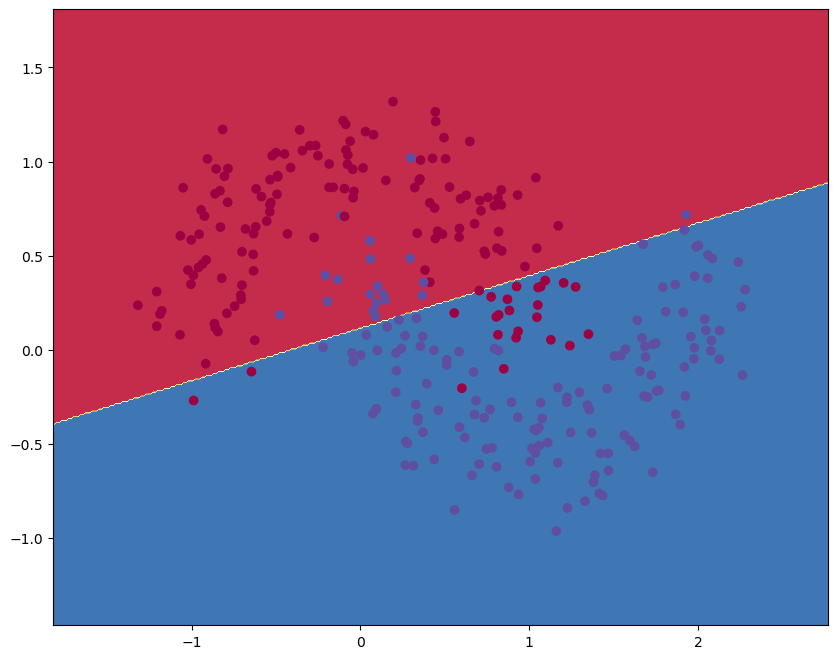

In [12]:
# TO find a and b we need to tranform from standard form ax+by+c to y=ax+b 
# Ax + By + C
A, B = classifier.coef_[0]
C = classifier.intercept_[0]

# y = ax + b where a = -A/B and b=-C/B
a = -A/B
b = -C/B
def prediction(A, a, b, func):
    return np.array([func(a=a, b=b, x1=x[0], x2=x[1]) for x in A])
plot_decision_boundary(lambda x: prediction(x, a, b, pred_linear))
print('le score obtenu est de: ', accuracy(y, prediction(X, a, b, pred_linear)))

# Neural Networks

You will now create a neural network to solve the previous problem.

In [13]:
# We will reuse the same datasets as previously, be careful X and y will be global variables for the rest 
# (to be avoided in general, but simplifies the notations for this mini porject)
np.random.seed(1)
X, y = sklearn.datasets.make_moons(300, noise=0.20)

 <font color='red'><b> Question 7</b></font> Complete the following variables and functions to code a **two-layer** neural network (1 hidden layer). The hidden layer will currently have **10 neurons** and we will use a learning rate of 3e-2.


In [14]:
# number of examples in the training set
N =  len(X)

# dimension of the input
d_input = 2

# dimension of the output
d_output = 2

# dimension of the hidden layer i.e. number of neurons in the hidden layer
d_hidden = 10

# learning rate for the gradient descente algorithm
epsilon = 3e-2

 <font color='red'><b> Question 8</b></font> Complete the following function to generate the parameters of our neural network. For this you will use the random library to generate parameters in the interval [-0.5, 0.5] using the random.random() function.

In [15]:
import random

In [16]:
def init_model(d_input: int, d_hidden: int, d_output: int):
    """
    Args:
        d_input (int): dimension of the input
        d_hidden (int): dimension of the hidden layer
        d_output (int): dimension of the output

    Returns:
        dict: Dictionary containing 4 keys, the weights/biases (W1,b1) and (W2,b2) of the neural network.
        Each of these weights and biases are lists or list of lists of float.
    """
    # Initialization of random parameters
    random.seed(0)
    
    # random.random() Return the next random floating point number in the range 0.0 <= X < 1.0
    # So random.random()-0.5 is in the range -0.5 <= X < 0.5

    # First layer of size d_input x d_hidden
    W1 = [[random.random()-0.5 for _ in range(d_hidden)] for _ in range(d_input)]
    
    # Bias of the first layer vector of size d_hidden
    b1 = [random.random()-0.5 for _ in range(d_hidden)]
    
    # Second layer of size d_hidden x d_output
    W2 = [[random.random()-0.5 for _ in range(d_output)] for _ in range(d_hidden)]
    
    # The bias of the second layer
    b2 = [random.random()-0.5 for _ in range(d_output)]
    
    # The model returned at the end is a dictionary of weights and biases
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return model

In [44]:
W1 = [[i*(j+1)+j+1 for i in range(d_hidden)] for j in range(d_input)]

# Bias of the first layer vector of size d_hidden
b1 = [j*2+1 for j in range(d_hidden)]

# Second layer of size d_hidden x d_output
W2 = [[random.random()-0.5 for _ in range(d_output)] for _ in range(d_hidden)]

# The bias of the second layer
b2 = [random.random()-0.5 for _ in range(d_output)]


In [47]:
X.shape, np.shape(W1), np.shape(b1)

((300, 2), (2, 10), (10,))

In [45]:
W1, b1

([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]],
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19])

In [46]:
np.array(W1) + np.array(b1)

array([[ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29],
       [ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39]])

In [51]:
np.shape(forward_layer(X, W1, b1))

(300, 10)

<font color='red'><b> Question 9</b></font> Implement the following mathematical functions which may be useful later. All vectors $v_1,v_2$ are python lists and the matrices $X$ and $W$ are lists of lists.

In [48]:
# dot product between two vectors
def dot_product(v1, v2):
    assert(len(v1)==len(v2))
    return sum([a*b for a, b in zip(v1, v2)])

# Add two vectors
def add_bias(v1, v2):
    assert(len(v1)==len(v2))
    return [float(a)+float(b) for a, b in zip(v1, v2)]

# Get the columns number "index" of W
def get_columns(W, index):
    assert(index <= len(W[0]))
    return [row[index] for row in W]

# Transpose a matrix
def transpose(W):
    return [w_col for w_col in zip(*W)]

# Multiplication between two matrices()
def matrix_multiplication(X, W):
    assert(len(X[0]) == len(W))
    return [[dot_product(X_row, W_col) for W_col in transpose(W)] for X_row in X]

# One hot encoding of labels.
def one_hot(Y):
    return [[1 if(i==v) else 0 for i in range(max(y)+1)] for v in Y]

# Hadamard matrix product
def hadamard_product(A, B):
    assert(len(A)==len(B) and len(A[0])==len(B[0]))
    return [[a*b for a, b in zip(a_row, b_row)] for a_row, b_row in zip(A, B)]

# Matrix substraction
def substract_matrix(A, B):
    assert(len(A)==len(B) and len(A[0])==len(B[0]))
    return [[a-b for a, b in zip(a_row, b_row)]for a_row, b_row in zip(A, B)]

# apply function to each value of a matrix
def apply_function_to_matrix(f, A):
    return [[f(a) for a in a_row] for a_row in A]

minus = lambda a,b: a-b

 <font color='red'><b> Question 10</b></font> Complete the forward_layer function by doing the following:
 $$ X \times W + b $$
 In which X represents the input, W the weights and and b the biases.
 Complete the sigmoid and feed_forward function.

In [49]:
def forward_layer(X, W, b):
    return [add_bias(col, b) for col in matrix_multiplication(X, W)]

In [19]:
import math

def sigmoid(x):
    """"
    Args:
        x (float): input
    returns:
        float : sigmoid(x)
    
    """
    return 1/(1 + math.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
    
def softmax(Z):
    # this line is to limit the overflow of the exp. results of softmax are the same without it. 
    Z = [[z - max(z_row) for z in z_row] for z_row in Z]
    exp_scores = apply_function_to_matrix(math.exp, Z) # Compute exp(z2)
    return [[exp_z/sum(exp_z_rows) for exp_z in exp_z_rows] for exp_z_rows in exp_scores]

Forward propagation

$$
\begin{aligned}
z_1 & = XW_1 + b_1  \\ 
a_1 & = sigmoid(z_1)=\frac{1}{1+\exp(-z_1)} \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)\\
\end{aligned}
$$


In [20]:
# for code refactoring a forward function that returns all the parameters z1, a1, z2 and probs (a2).
def forward_fun(X, W1, b1, W2, b2):
    z1 = forward_layer(X, W1, b1) # Output of the first layer
    a1 = apply_function_to_matrix(sigmoid, z1) # Sigmoid activation of the first layer
    z2 = forward_layer(a1, W2, b2) # Output of the second layer
    probs = softmax(z2) #Apply softmax activation function on z2
    return z1, a1, z2, probs

In [21]:
def forward_function(X, W1, b1, W2, b2):
    _, _, _, probs = forward_fun(X, W1, b1, W2, b2)
    return probs

In [22]:
# Test your result:
np.random.seed(1)
model_test = init_model(4,3,2)
X_debug = [[random.random() for i in range(4)]]
#X_debug = [[1,2,3,4], [5,6,8,9]] # Test with an example in dimension 2 Works fine.
forward_function(X_debug, model_test['W1'], model_test['b1'], model_test['W2'], model_test['b2'])

[[0.47916272248062897, 0.520837277519371]]

You are supposed to find: [[0.48, 0.52]] (if you used the random.random function to initialize the weights)

 <font color='red'><b> Question 11</b></font> We recall the feed forward equations (everything is in matrix form, so $X\in\mathbb{R}^{N\times d_{input}}$,$W_1\in\mathbb{R}^{d_{input }\times d_{hidden}}$, etc). Complete the back propagation equations and complete the sigmoid function, forward function and train_model. Gradient descent on W1 is provided to you.
Reminder on backprop : https://towardsdatascience.com/backpropagation-the-natural-proof-946c5abf63b1

Loss function 

$$
\begin{aligned}
L(y,\hat{y}) & = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$


$$
\begin{aligned}
& \delta_2 = probs - y
&
& \delta_1 = h'(a_1) * \delta_2 W_2^T
\end{aligned}
$$


$$
\begin{aligned}
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_2
&
& \frac{\partial{L}}{\partial{b_2}} = \delta_2
\end{aligned}
$$


$$
\begin{aligned}
& \frac{\partial{L}}{\partial{W_1}} = X^T \delta_1
&
& \frac{\partial{L}}{\partial{b_1}} = \delta_1
\end{aligned}
$$


The transpose is shifted to the other variable. because of the implementation.

In [23]:
def backpropagation(z1, a1, z2, probs, W1, W2, X, y):
    delta2 = substract_matrix(probs, one_hot(y))
    dW2 = matrix_multiplication(transpose(a1), delta2)
    db2 = [sum(d) for d in transpose(delta2)]
    
    sigprime_z1 = apply_function_to_matrix(sigmoid_prime, z1)
    delta1 = hadamard_product(sigprime_z1, matrix_multiplication(delta2, transpose(W2)))
    dW1 = matrix_multiplication(transpose(X), delta1)
    db1 = [sum(d) for d in transpose(delta1)]
    return dW1, db1, dW2, db2

def gradient_descent(W1, b1, W2, b2, dW1, db1, dW2, db2, epsilon):
    W1 =[[w - epsilon * d for d, w in zip(dW1_row, W1_row)]for dW1_row, W1_row in zip(dW1, W1)]
    b1 = [b - epsilon * db for db, b in zip(db1, b1)]
    W2 = [[w - epsilon * d for d, w in zip(dW2_row, W2_row)] for dW2_row, W2_row in zip(dW2, W2)]
    b2 = [b - epsilon * db for db, b in zip(db2, b2)]
    return W1, b1, W2, b2

In [24]:
def train_model(X, y, model, nn_hdim, num_epochs=1, print_loss=False):

    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    # Gradient descent. For each batch...
    for i in range(0, num_epochs):
        # Forward propagation (copy/paste inside forward_function previously defined)
        z1, a1, z2, probs = forward_fun(X, W1, b1, W2, b2)
        
        # Estimate the loss (c)
        correct_logprobs = [-math.log(y_hat[y_r]) for y_r, y_hat in zip(y, probs)] # Calculation of cross entropy for each example
        data_loss = 1./N * sum(correct_logprobs) # Total loss

        # Backpropagation
        dW1, db1, dW2, db2 = backpropagation(z1, a1, z2, probs, W1, W2, X, y)
        
        # Gradient descente
        W1, b1, W2, b2 = gradient_descent(W1, b1, W2, b2, dW1, db1, dW2, db2, epsilon)

        # Updating weights and biases
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        current_accuracy = accuracy(y, predict(model, X))

        # Loss display
        if print_loss and i % 50 == 0:
            print("Loss at epoch %i: %f" %(i, data_loss), "Accuracy :", current_accuracy)

    return model

We will need a prediction function that uses our trained model to return predictions. Unlike the model outputs which are floats in [0,1] for each class, the model prediction is 1 on the class whose score is maximum and 0 elsewhere. We use numpy's argmax function to do this automatically.

<font color='red'><b> Question 12</b></font> Complete the function predict() :

In [25]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation, like before
    probs = forward_function(x, W1, b1, W2, b2)
    return np.argmax(probs, axis=1)

<font color='red'><b> Question 13</b></font> Train the model for different number of epochs and comment on your results.

In [26]:
model = init_model(d_input, d_hidden, d_output)
model = train_model(X, y, model, d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))

Loss at epoch 0: 0.732492 Accuracy : 0.5
Loss at epoch 50: 0.331724 Accuracy : 0.82
Loss at epoch 100: 0.274587 Accuracy : 0.8633333333333333
Loss at epoch 150: 0.249642 Accuracy : 0.8866666666666667
The final accuracy obtained is : 0.9633333333333334


<font color='blue'><b> Ansewer </b></font> :
The results are far significantly better than the linear model we observe an accuracy of 96%. the curve is well shaped in between the clusters.

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

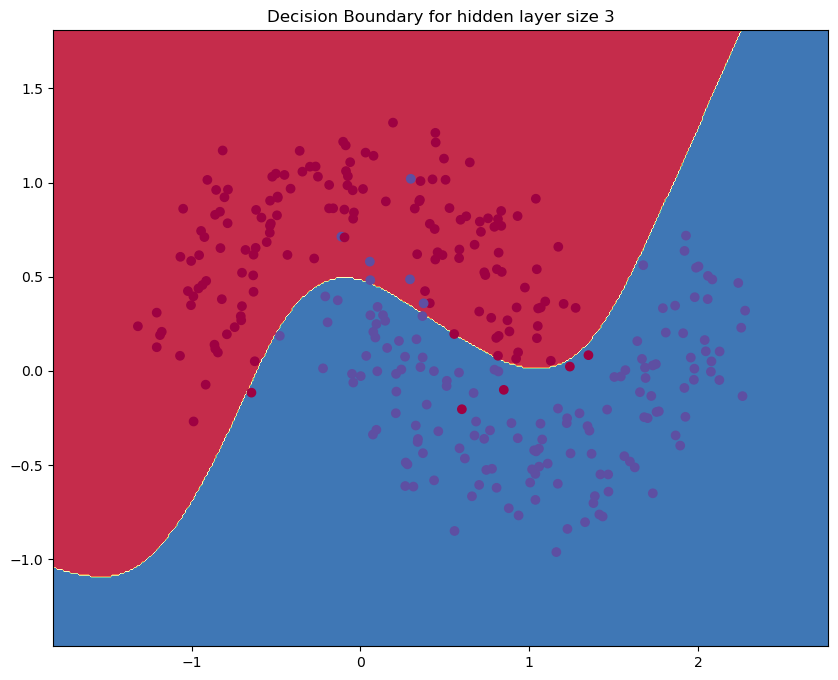

In [27]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

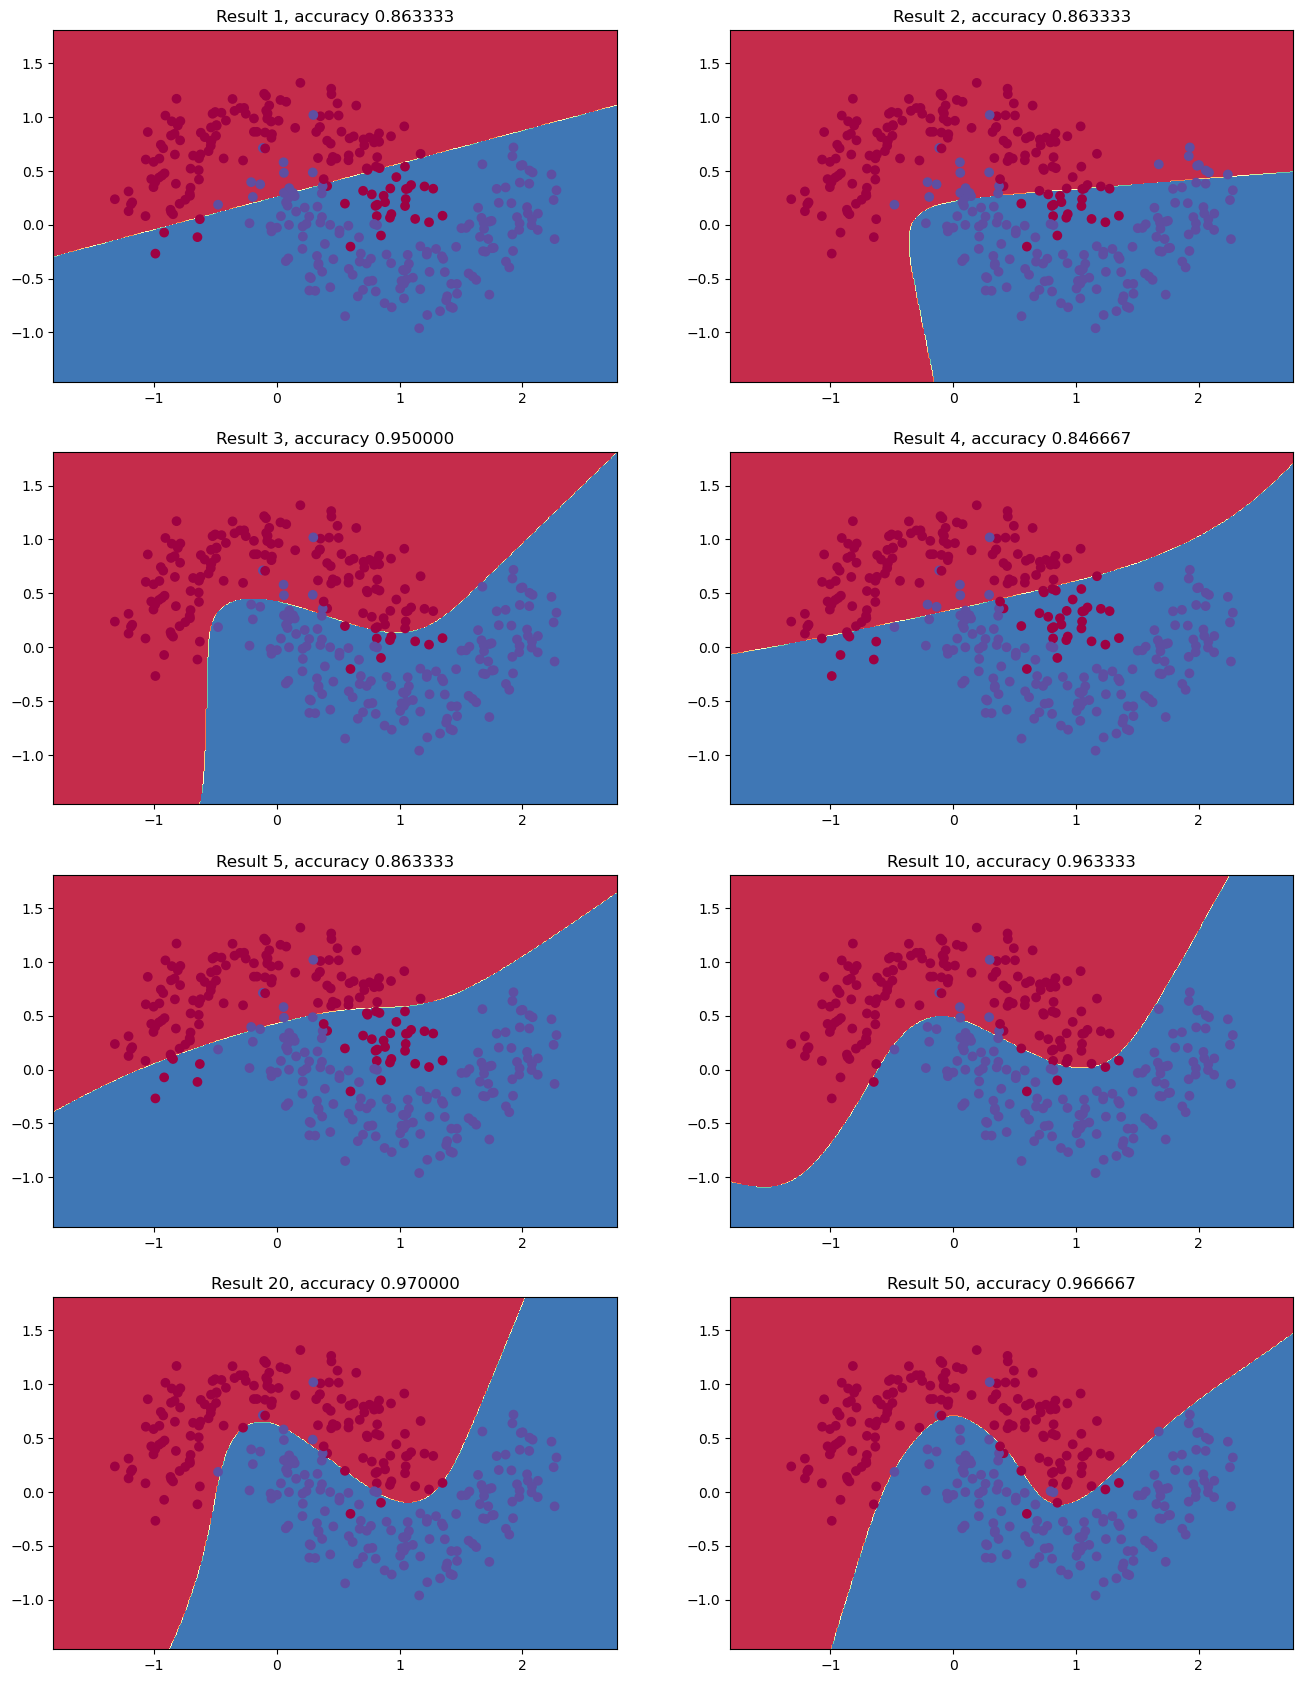

In [28]:
plt.figure(figsize=(16, 32))
size_hidden_layer= [1, 2, 3, 4, 5, 10, 20, 50]
for i, size in enumerate(size_hidden_layer):
    plt.subplot(6, 2, i+1)
    model = init_model(d_input, size, d_output)
    model = train_model(X, y, model, size, num_epochs=200, print_loss=False)
    plt.title('Result %d, accuracy %f' % (size, accuracy(y, predict(model, X))))
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

<font color='blue'><b> Ansewer </b></font> :
If we fix size of the number of epochs and change the number of layers of the model to see how it behaves.

I observe that for some reason the 3 layers model is better than the 4 and 5 layers models. and the best model is the 20 layer model. 

Though we can acheive better performances with smaller models if we do more epochs. that what I'm gonna test in the following

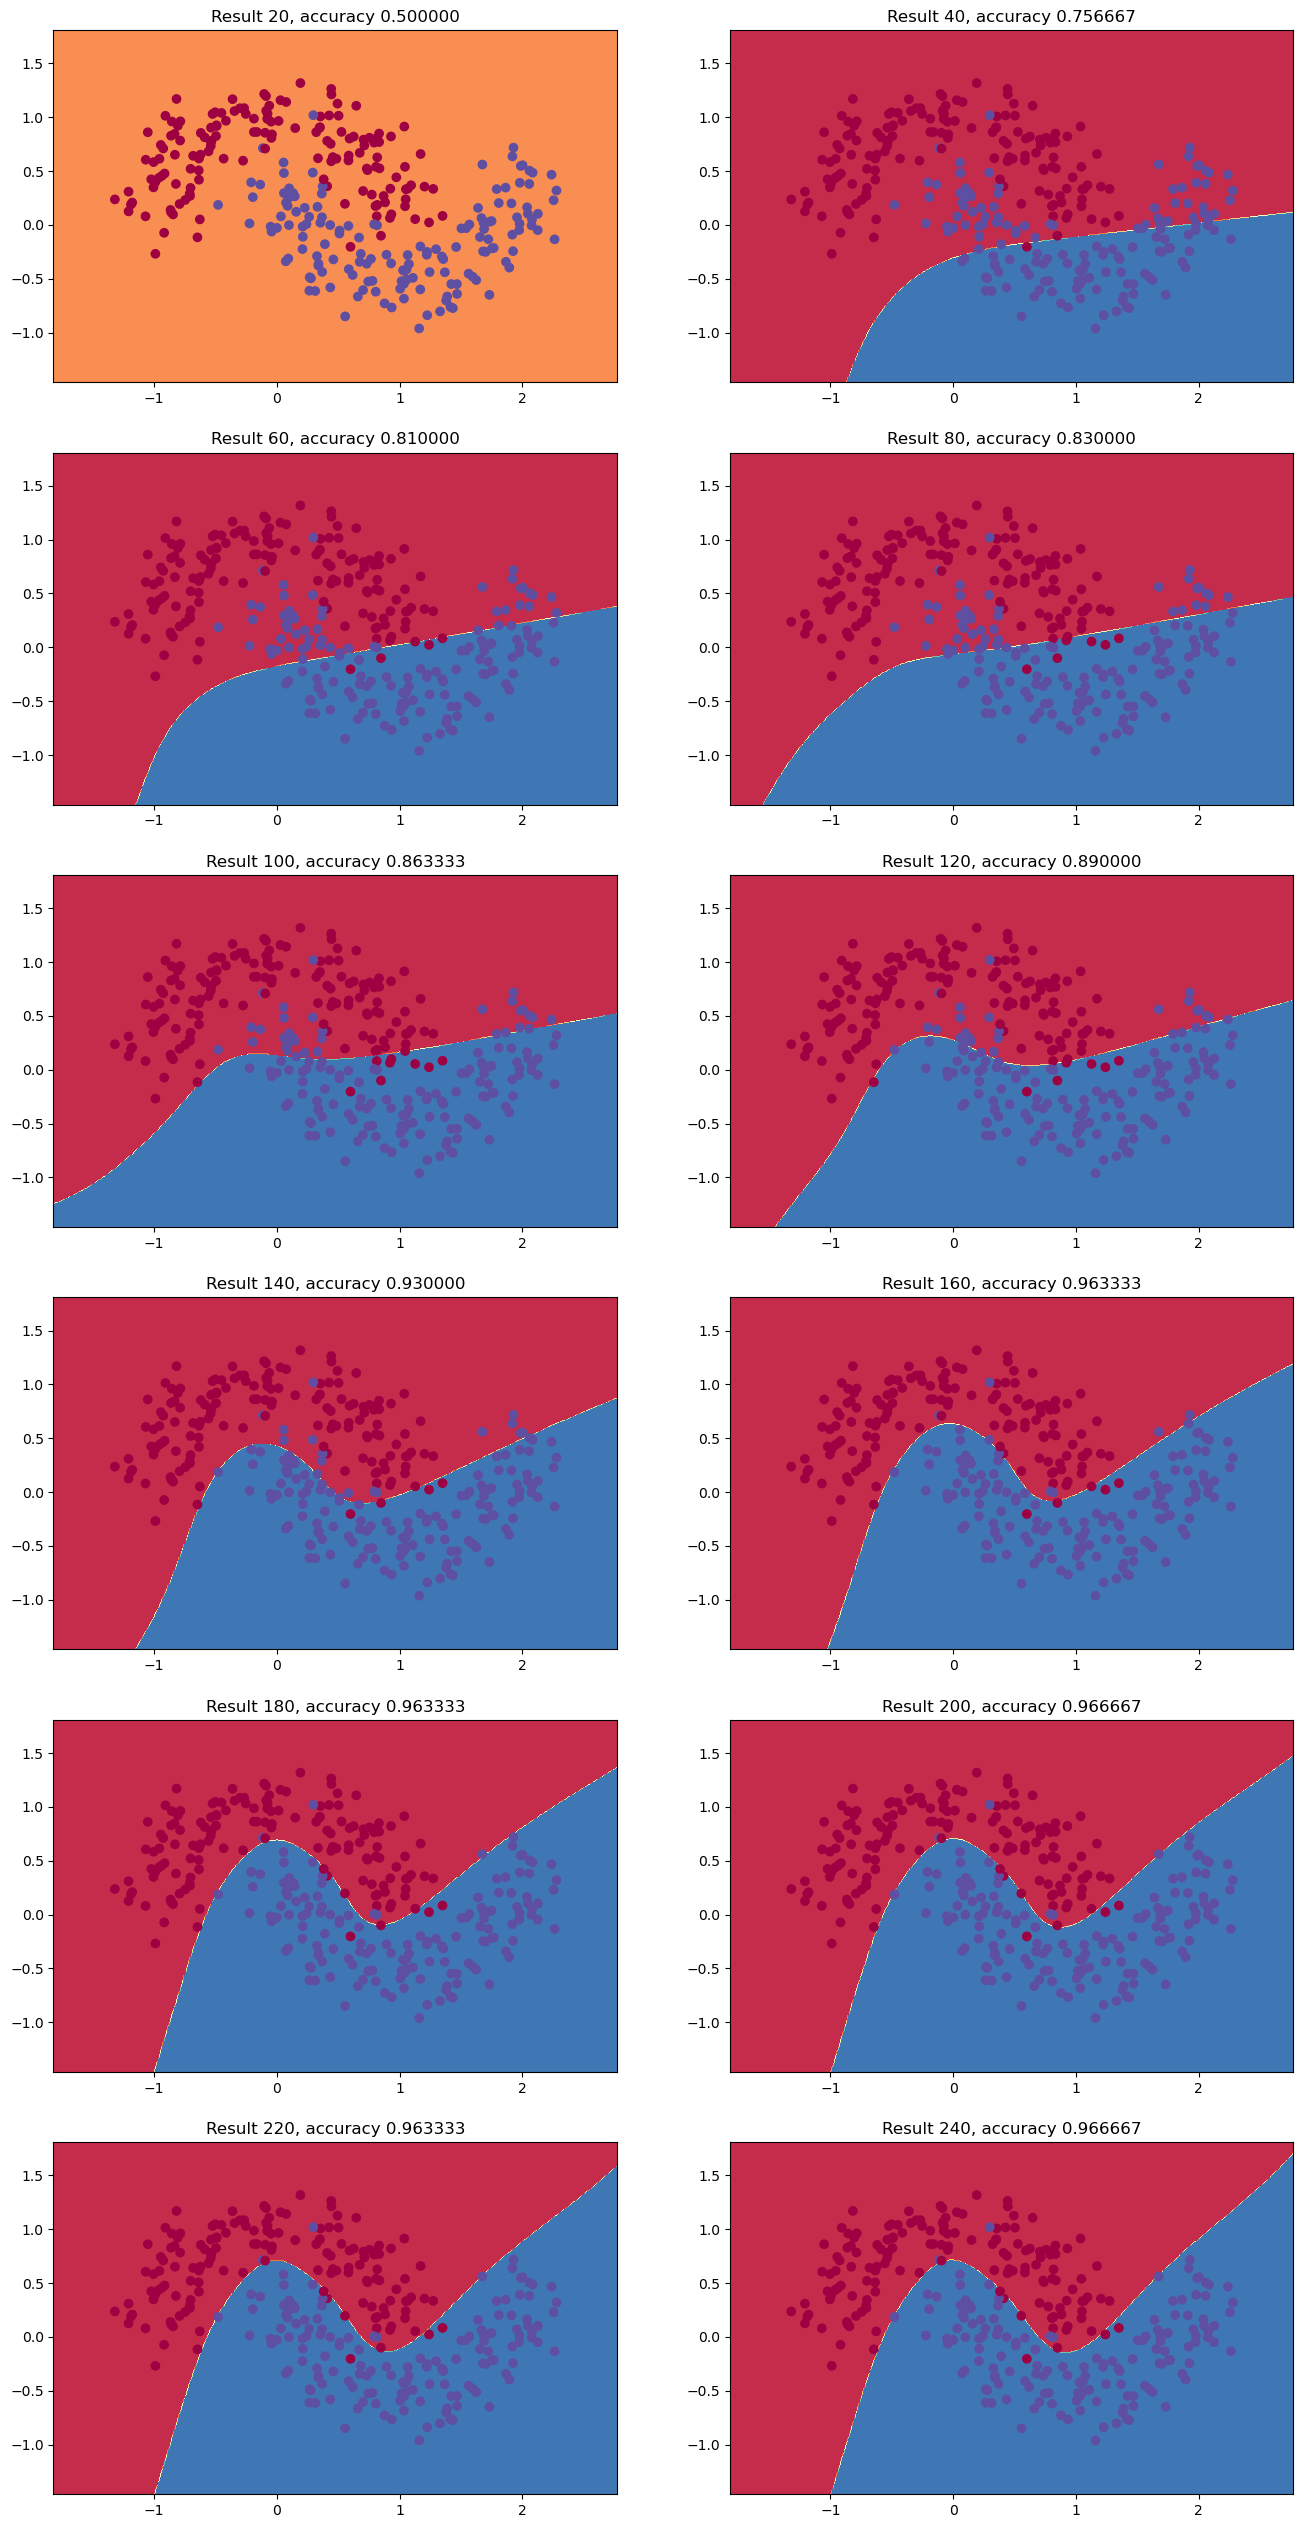

In [29]:
plt.figure(figsize=(16, 32))
epochs= [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
for i, epoch in enumerate(epochs):
    plt.subplot(6, 2, i+1)
    model = init_model(d_input, size, d_output)
    model = train_model(X, y, model, 10, num_epochs=epoch, print_loss=False)
    plt.title('Result %d, accuracy %f' % (epoch, accuracy(y, predict(model, X))))
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

<font color='blue'><b> Ansewer </b></font> :

With 100 epochs of training or less, the model is worse than the linear regression.

There's no significant increase in accuracy after 160 epochs which is about the best results.

# Application on a real dataset

We will now apply our model on a real dataset well known in the world of Machine Learning : le MNIST (https://en.wikipedia.org/wiki/MNIST_database) which is on Sklearn.

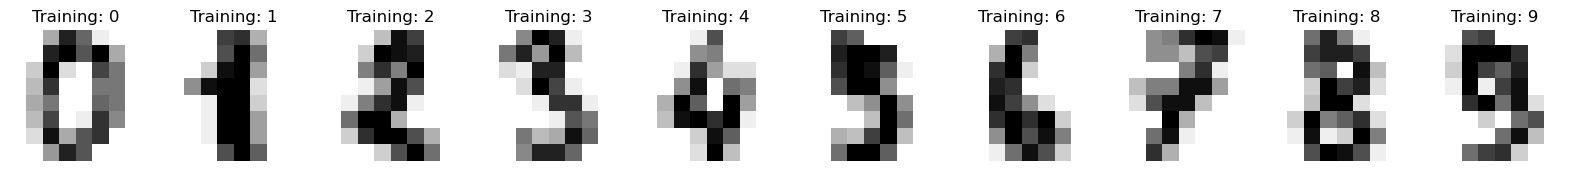

In [30]:
digits = sklearn.datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [31]:
X = digits.images.reshape((n_samples, -1)) # We reshape the images into vector
y = digits.target

<font color='red'><b> Question 13 </b></font> Complete the input and output dimensions of your network so that it is adapted to the MNIST Dataset and restart the training (be careful, the training will now take a few minutes without additional code optimization).


In [32]:
N = len(X) 
d_input = len(X[0])
d_output = max(y)+1
d_hidden = 20 

# Gradient descent parameter
epsilon = 0.001 # le learning rate doit être plus petit qu'avant sinon l'entrainement diverge

In [33]:
model = init_model(d_input, d_hidden, d_output)
model = train_model(X, y, model, d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained is :", accuracy(y, predict(model, X)))

Loss at epoch 0: 2.877707 Accuracy : 0.14802448525319978
Loss at epoch 50: 0.390043 Accuracy : 0.9137451307735114
Loss at epoch 100: 0.146182 Accuracy : 0.9760712298274903
Loss at epoch 150: 0.223796 Accuracy : 0.9621591541457986
The final accuracy obtained is : 0.9905397885364496


<font color='red'><b> Question 14 </b></font> : 
Divide the MNIST dataset into training and validation datasets.
Find good hyper-parameters on your model. Why create a validation dataset?


<font color='blue'><b>Answer </b></font> :
The Validation dataset is used to validate our model. to make sure it generalizes well on unseen data, in other words to check if it overfits the data.

In [34]:
def shuffle_and_split_data(X, y, train_percentage):
    N = len(X)
    train_size = int(N * train_percentage) # 80% of samples for training
    test_size = N - train_size # 20% remaining for test
    p = np.random.permutation(N) # shuffle X and y with the same random permutation. 
    X = X[p]
    y = y[p]

    # split data
    X_train = X[0:train_size]
    y_train = y[0:train_size]
    
    X_test = X[train_size:N]
    y_test = y[train_size:N]
    return X_train, y_train, X_test, y_test

In [35]:
X_train, y_train, X_test, y_test = shuffle_and_split_data(X, y, 0.8)

In [36]:
model = init_model(d_input, d_hidden, d_output)
model = train_model(X_train, y_train, model, d_hidden, num_epochs=200, print_loss=True)
print("The final accuracy obtained is :", accuracy(y_train, predict(model, X_train)))

Loss at epoch 0: 2.289915 Accuracy : 0.1732776617954071
Loss at epoch 50: 0.273439 Accuracy : 0.941544885177453
Loss at epoch 100: 0.124644 Accuracy : 0.9756437021572721
Loss at epoch 150: 0.069783 Accuracy : 0.9895615866388309
The final accuracy obtained is : 0.9846903270702854


In [37]:
print("The test accuracy obtained is :", accuracy(y_test, predict(model, X_test)))

The test accuracy obtained is : 0.9527777777777777


<font color='green'><b> The question 14 </b></font> : is moved to the end of the notebook to benifit from the fast model implemented in Question 15.

<font color='red'><b> Questions 15 (Bonus) </b></font> There are many ways to make your neural network more efficient, you can find out about the following points of improvement of your choice, explain their usefulness and implement those you want by analyzing the new results obtained (on the game of data of your choice). Don’t hesitate to be curious and look for good resources to help you!

* Using the Numpy library to handle matrix operations, rather than using Python lists of lists (this will simplify your code and should reduce training times by several orders of magnitude depending on the size of your network, allowing you to to train larger networks and better optimize hyperparameters on the MNIST dataset)
* Add Weight Decay (https://fr.wikipedia.org/wiki/Weight_decay) 
* Stochastic or Batch Gradient Descent (https://fr.wikipedia.org/wiki/Algorithme_du_gradient_stochastique)
* Added more layers (make the number of layers a model parameter)

# An object oriented implementation

Used numpy.

Added parameters and no use of out global variables.

Implemented Weight decay.

Implemented a option that will return the best scoring model.

Optimized the loop to calculate only one time the forward propagation, by doing the first forward pass out of the loop.

In [91]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def softmax(Z):
    exp_scores = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y
    
class MLP(object):
    def __init__(self, learning_rate, lambd, num_epochs, d_input, d_hidden, d_output):
        self.lr = learning_rate
        self.num_epochs = num_epochs
        np.random.seed(0)    
        self.W1 = np.random.rand(d_input, d_hidden)-0.5 
        self.b1 = np.random.rand(d_hidden)-0.5 
        self.W2 = np.random.rand(d_hidden, d_output)-0.5 
        self.b2 = np.random.rand(d_output)-0.5 
        self.best_model_iteration = 0
        self.lambd = lambd # Weight decay
        
    def update_params(self, W1, b1, W2, b2, best_model_iteration):
        self.W1 = W1
        self.b1 = b1 
        self.W2 = W2
        self.b2 = b2
        self.best_model_iteration = best_model_iteration
        
    def forward_function(self, X):
        z1 = X.dot(self.W1) + self.b1.T # Output of the first layer
        a1 = sigmoid(z1) # Sigmoid activation of the first layer
        z2 = a1.dot(self.W2) + self.b2.T # Output of the second layer
        probs = softmax(z2) #Apply softmax activation function on z2
        return z1, a1, z2, probs
    
    def backpropagation(self, z1, a1, z2, probs, X, y):
        delta2 = probs - one_hot(y)
        dW2 = a1.T.dot(delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = sigmoid_prime(z1) * delta2.dot(self.W2.T)
        dW1 = X.T.dot(delta1)
        db1 = np.sum(delta1, axis=0)
        return dW1, db1, dW2, db2

    def gradient_descent(self, dW1, db1, dW2, db2):
        self.W1 = self.W1 - self.lr*self.lambd*self.W1 - self.lr * dW1
        self.b1 = self.b1 - self.lr*self.lambd*self.b1 - self.lr * db1
        self.W2 = self.W2 - self.lr*self.lambd*self.W2 - self.lr * dW2
        self.b2 = self.b2 - self.lr*self.lambd*self.b2 - self.lr * db2
    
    def predict(self, X):
        _, _, _, probs = self.forward_function(X)
        return np.argmax(probs, axis=1)
    
    def get_predictions(self, probs):
        return np.argmax(probs, axis=1)
    
    def accuracy(self, y, y_pred):
        return np.average(y == y_pred)                        
    
    def estimate_loss(self, y, probs):
        correct_logprobs = -np.log(probs[np.arange(len(probs)), y]) # Calculation of cross entropy for each example
        return np.average(correct_logprobs) # Total loss
          
    def fit(self, X, y, print_loss=False, return_best_model=True):
        z1, a1, z2, probs = self.forward_function(X) # this will help us not compute the accuracy two times in the loop.
        # best model
        bm = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2, 
                      'accuracy': self.accuracy(y, self.get_predictions(probs)), 'iteration': -1}
        
        for i in range(0, self.num_epochs):
            dW1, db1, dW2, db2 = self.backpropagation(z1, a1, z2, probs, X, y)
            self.gradient_descent(dW1, db1, dW2, db2) # update parameters
            z1, a1, z2, probs = self.forward_function(X)
    
            current_accuracy = self.accuracy(y, self.get_predictions(probs)) # predictions of epoch

            if print_loss and i % 100 == 0:
                print("Loss at epoch %i: %f" %(i, self.estimate_loss(y, probs)), "Accuracy :", current_accuracy)
                
            if(return_best_model and current_accuracy > bm['accuracy']):
                bm = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2, 
                              'accuracy': self.accuracy(y, self.get_predictions(probs)), 'iteration': i}
        
        if(print_loss and return_best_model):
            self.update_params(bm['W1'], bm['b1'], bm['W2'], bm['b2'], bm['iteration'])
            print("The best accuracy obtained is :", model.accuracy(y, model.predict(X)), ", at this iteration :", model.best_model_iteration)
        elif(print_loss):
            print("The model accuracy obtained is :", model.accuracy(y, model.predict(X)))

# Weight decay

In [106]:
model = MLP(0.001, 0, 50, d_input, d_hidden, d_output)
model.fit(X_train, y_train, print_loss=True, return_best_model=False)
print("The test accuracy obtained is :", model.accuracy(y_test, model.predict(X_test)))

Loss at epoch 0: 2.322833 Accuracy : 0.15518441196938065
The model accuracy obtained is : 0.8566457898399443
The test accuracy obtained is : 0.8194444444444444


In [107]:
model = MLP(0.001, 0.0001, 50, d_input, d_hidden, d_output)
model.fit(X_train, y_train, print_loss=True, return_best_model=False)
print("The test accuracy obtained is :", model.accuracy(y_test, model.predict(X_test)))

Loss at epoch 0: 2.322833 Accuracy : 0.15518441196938065
The model accuracy obtained is : 0.8886569241475296
The test accuracy obtained is : 0.8833333333333333


<font color='blue'><b> Ansewer </b></font> :

The dataset is so small to test weight decay on it. but we can do small number of epochs to see the benefit. like 50 epochs.

We see that the result is about 3% better in training and 6% for testing 

# Normalization

In [109]:
def normalize_data(X):
    return X/np.max(X)

X_train, y_train, X_test, y_test = shuffle_and_split_data(normalize_data(X), y, 0.8)

In [112]:
model = MLP(0.001, 0., 50, d_input, d_hidden, d_output)
model.fit(X_train, y_train, print_loss=True, return_best_model=False)
print("The final accuracy obtained is :", accuracy(y_test, model.predict(X_test)))

Loss at epoch 0: 2.315426 Accuracy : 0.12456506610995129
The model accuracy obtained is : 0.9032707028531664
The final accuracy obtained is : 0.8861111111111111


<font color='blue'><b> Ansewer </b></font> :

With 50 epochs, the same as before, we see that the results are even better than 

<font color='red'><b> Question 14 Bonus </b></font> 
How can you ensure that your accuracy on the validation set is significantly different from that of the training set? Find such hyperparameters and plot the accuracy on the training set and on the validation set during the training of your network (according to the epochs). What do you observe?

# WORK IN PROGRESS  Multi layer model

In [46]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def softmax(Z):
    exp_scores = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y
    
class MLP(object):
    def __init__(self, learning_rate, num_epochs, d_input, d_hidden, d_output):
        self.lr = learning_rate
        self.num_epochs = num_epochs
        np.random.seed(0) 
        
        self.input_W = np.random.rand(d_input, d_hidden[0])-0.5
        self.input_b = np.random.rand(d_hidden[0])-0.5 
        
        self.hidden_W = [ 0 for _ in range(len(d_hidden)-1)]
        for i in range(0, len(d_hidden)-1):
            self.hidden_W[i] = np.random.rand(d_hidden[i], d_hidden[i+1])-0.5 
        self.output_W = np.random.rand(d_hidden[-1], d_output)-0.5
        self.output_b = np.random.rand(d_hidden[-1])-0.5 
        
        self.best_model_iteration = 0
        

        
    def update_params(self, W1, b1, W2, b2, best_model_iteration):
        self.W1 = W1
        self.b1 = b1 
        self.W2 = W2
        self.b2 = b2
        self.best_model_iteration = best_model_iteration
        
    def forward_function(self, X):
        z1 = X.dot(self.W1) + self.b1.T # Output of the first layer
        a1 = sigmoid(z1) # Sigmoid activation of the first layer
        z2 = a1.dot(self.W2) + self.b2.T # Output of the second layer
        probs = softmax(z2) #Apply softmax activation function on z2
        return z1, a1, z2, probs
    
    def backpropagation(self, z1, a1, z2, probs, X, y):
        delta2 = probs - one_hot(y)
        dW2 = a1.T.dot(delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = sigmoid_prime(z1) * delta2.dot(self.W2.T)
        dW1 = X.T.dot(delta1)
        db1 = np.sum(delta1, axis=0)
        return dW1, db1, dW2, db2

    def gradient_descent(self, dW1, db1, dW2, db2):
        self.W1 = self.W1 - self.lr * dW1
        self.b1 = self.b1 - self.lr * db1
        self.W2 = self.W2 - self.lr * dW2
        self.b2 = self.b2 - self.lr * db2
    
    def predict(self, X):
        _, _, _, probs = self.forward_function(X)
        return np.argmax(probs, axis=1)
    
    def get_predictions(self, probs):
        return np.argmax(probs, axis=1)
    
    def accuracy(self, y, y_pred):
        return np.average(y == y_pred)                        
    
    def estimate_loss(self, y, probs):
        correct_logprobs = -np.log(probs[np.arange(len(probs)), y]) # Calculation of cross entropy for each example
        return np.average(correct_logprobs) # Total loss
          
    def fit(self, X, y, print_loss=False, return_best_model=True):
        z1, a1, z2, probs = self.forward_function(X) # this will help us not compute the accuracy two times in the loop.
        # best model
        bm = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2, 
                      'accuracy': self.accuracy(y, self.get_predictions(probs)), 'iteration': -1}
        
        for i in range(0, self.num_epochs):
            dW1, db1, dW2, db2 = self.backpropagation(z1, a1, z2, probs, X, y)
            self.gradient_descent(dW1, db1, dW2, db2) # update parameters
            z1, a1, z2, probs = self.forward_function(X)
    
            current_accuracy = self.accuracy(y, self.get_predictions(probs)) # predictions of epoch

            if print_loss and i % 50 == 0:
                print("Loss at epoch %i: %f" %(i, self.estimate_loss(y, probs)), "Accuracy :", current_accuracy)
                
            if(return_best_model and current_accuracy > bm['accuracy']):
                bm = {'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2, 
                              'accuracy': self.accuracy(y, self.get_predictions(probs)), 'iteration': i}
        
        if(return_best_model):
            self.update_params(bm['W1'], bm['b1'], bm['W2'], bm['b2'], bm['iteration'])
            print("The best accuracy obtained is :", model.accuracy(y, model.predict(X)), ", at this iteration :", model.best_model_iteration)
            

In [47]:
model = MLP(3e-2, 100000, 2, [7, 10, 3], 2)
